In [ ]:
#importing necessary libraries
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Number of assets
n_assets = 5

# Define expected returns and covariance matrix (replace with your data)
expected_returns = np.array([0.08, 0.10, 0.09, 0.09, 0.11])
cov_matrix = np.array([[0.04, 0.02, 0.015, 0.01, 0.025],
                       [0.02, 0.03, 0.01, 0.015, 0.02],
                       [0.015, 0.01, 0.02, 0.015, 0.01],
                       [0.01, 0.015, 0.015, 0.03, 0.02],
                       [0.025, 0.02, 0.01, 0.02, 0.04]])



In [ ]:
# Define the risk tolerance and target return
risk_tolerance = 0.06
target_return = 0.05

# Define the variable for portfolio weights
weights = cp.Variable(n_assets)

# Define the expected return and risk objectives
expected_return = cp.sum(expected_returns @ weights)
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Define the optimization problem
constraints = [cp.sum(weights) == 1, expected_return >= target_return, portfolio_risk <= risk_tolerance,weights >= 0]
objective = cp.Maximize(expected_return)
problem = cp.Problem(objective, constraints)

Portfolio Weights:
[3.96480619e-09 2.57520588e-09 4.42806578e-09 5.17110470e-09
 9.99999984e-01]
Portfolio Expected Return: 0.109999999663324
Portfolio Risk (Standard Deviation): 0.19999999826380524


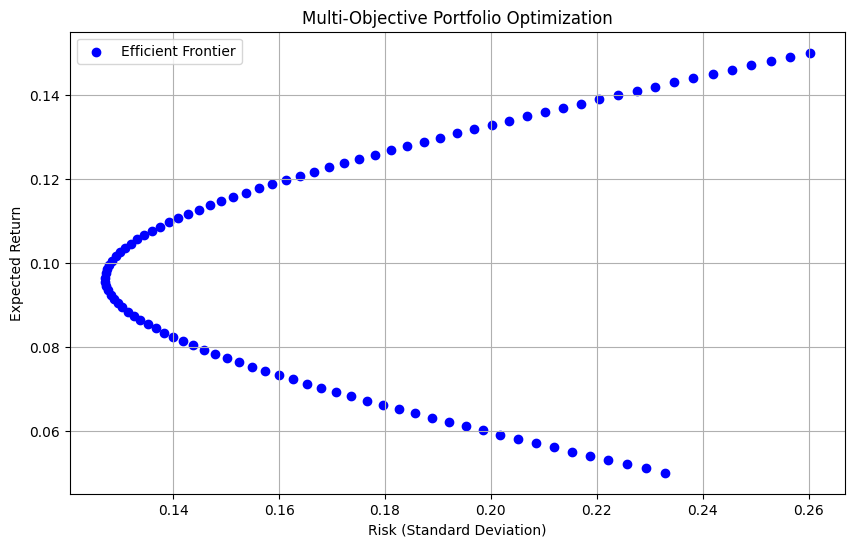

In [ ]:



# Solve the multi-objective optimization problem
problem.solve()

# Extract portfolio weights
portfolio_weights = weights.value

# Print the results
print("Portfolio Weights:")
print(portfolio_weights)
print("Portfolio Expected Return:", expected_return.value)
print("Portfolio Risk (Standard Deviation):", np.sqrt(portfolio_risk.value))

# Plot the efficient frontier
risk_values = []
return_values = []

for r in np.linspace(0.05, 0.15, 100):
    expected_return = cp.sum(expected_returns @ weights)
    portfolio_risk = cp.quad_form(weights, cov_matrix)
    constraints = [cp.sum(weights) == 1, expected_return == r]
    problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
    problem.solve()
    risk_values.append(np.sqrt(portfolio_risk.value))
    return_values.append(r)

plt.figure(figsize=(10, 6))
plt.scatter(risk_values, return_values, c='b', marker='o', label='Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Multi-Objective Portfolio Optimization')
plt.grid()
plt.legend()
plt.show()

